In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#First let's generate some data to classify with logistic regression
num_values=50
t1_x1_values=np.ones([1,num_values])*2+(np.random.rand(num_values)-.5)*1.5
t1_x2_values=np.ones([1,num_values])*3+(np.random.rand(num_values)-.5)*1.5
t2_x1_values=np.ones([1,num_values])*3+(np.random.rand(num_values)-.5)*1.5
t2_x2_values=np.ones([1,num_values])*2+(np.random.rand(num_values)-.5)*1.5
x1_values=np.concatenate((t1_x1_values, t2_x1_values), axis=1)[0]
x2_values=np.concatenate((t1_x2_values, t2_x2_values), axis=1)[0]
y_values=np.concatenate((np.ones([1,num_values]), np.zeros([1,num_values])), axis=1)[0]

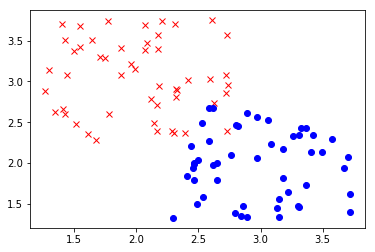

In [4]:
#Quickly visualize the data
plt.plot(t1_x1_values, t1_x2_values, 'rx', t2_x1_values, t2_x2_values, 'bo')
plt.show()

In [27]:
#Run the logistic regression

#Variables to record progress for the indices
t0_values=[]
t1_values=[]
t2_values=[]
error_values=[]

#Starting values (somewhat random)
t0=1
t1=5
t2=2

#Set the number of iterations and learning rate
num_iterations=1000
learning_rate=.1
for i in range(0, num_iterations):
    t0_temp=0
    t1_temp=0
    t2_temp=0
    for j in range(0, len(x1_values)):
        #Our hypothesis function is a sigmoidal, in this case. The error function is similar to linear regression otherwise.
        t0_temp+=((1/(1+np.exp(-t0-t1*x1_values[j]-t2*x2_values[j])))-y_values[j])
        t1_temp+=((1/(1+np.exp(-t0-t1*x1_values[j]-t2*x2_values[j])))-y_values[j])*x1_values[j]
        t2_temp+=((1/(1+np.exp(-t0-t1*x1_values[j]-t2*x2_values[j])))-y_values[j])*x2_values[j]
    t0-=learning_rate*t0_temp/len(x1_values)
    t1-=learning_rate*t1_temp/len(x1_values)
    t2-=learning_rate*t2_temp/len(x1_values)
    t0_values.append(t0)
    t1_values.append(t1)
    t2_values.append(t2)
    predicted_values=((1/(1+np.exp(-t0-t1*x1_values-t2*x2_values))))
    #This values calculates how many misclassified points there will be. Note that because the way the points are set up it can't
    #be perfect.
    error_values.append(sum(predicted_values[1:50]<.5)+50-sum(predicted_values[51:100]<.5))

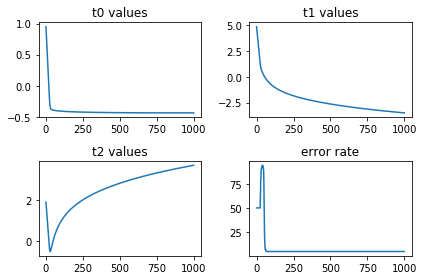

In [40]:
#Plot the different values and the error rate
plt.figure()
plt.subplot(221)
plt.title('t0 values')
plt.plot(t0_values)
plt.subplot(222)
plt.title('t1 values')
plt.plot(t1_values)
plt.subplot(223)
plt.title('t2 values')
plt.plot(t2_values)
plt.subplot(224)
plt.title('error rate')
plt.plot(error_values)
plt.tight_layout()
plt.show()

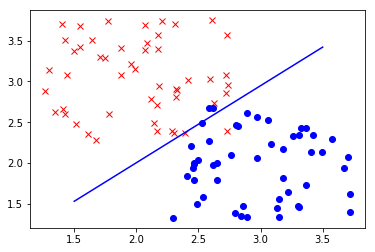

In [51]:
#Now, let's look at the data with the our classifier line superimposed
#I worked through the math of the sigmoidal to determine where it equals .5, and sure enough it defines a line of values given by
#y=(3.498x+.4367)/3.711, which I'll plot over our data
plt.plot(t1_x1_values, t1_x2_values, 'rx', t2_x1_values, t2_x2_values, 'bo')
plt.plot([1.5,3.5],[1.53, 3.42], 'b-')
plt.show()

In [52]:
#Now, let's run it again, with a regularization term as well, to see if it comes out any different.

#Variables to record progress for the indices
t0_values=[]
t1_values=[]
t2_values=[]
error_values=[]

#Starting values (somewhat random)
t0=1
t1=5
t2=2

#Set the number of iterations and learning rate
num_iterations=1000
learning_rate=.1
regularization_term=.1
for i in range(0, num_iterations):
    t0_temp=0
    t1_temp=0
    t2_temp=0
    for j in range(0, len(x1_values)):
        #Our hypothesis function is a sigmoidal, in this case. The error function is similar to linear regression otherwise.
        t0_temp+=((1/(1+np.exp(-t0-t1*x1_values[j]-t2*x2_values[j])))-y_values[j])
        t1_temp+=((1/(1+np.exp(-t0-t1*x1_values[j]-t2*x2_values[j])))-y_values[j])*x1_values[j]
        t2_temp+=((1/(1+np.exp(-t0-t1*x1_values[j]-t2*x2_values[j])))-y_values[j])*x2_values[j]
    t0-=(learning_rate*t0_temp+regularization_term*t0)/len(x1_values)
    t1-=(learning_rate*t1_temp+regularization_term*t1)/len(x1_values)
    t2-=(learning_rate*t2_temp+regularization_term*t2)/len(x1_values)
    t0_values.append(t0)
    t1_values.append(t1)
    t2_values.append(t2)
    predicted_values=((1/(1+np.exp(-t0-t1*x1_values-t2*x2_values))))
    #This values calculates how many misclassified points there will be. Note that because the way the points are set up it can't
    #be perfect.
    error_values.append(sum(predicted_values[1:50]<.5)+50-sum(predicted_values[51:100]<.5))

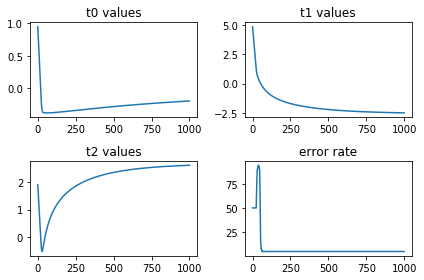

In [53]:
#Plot the different coefficients and the error rate
plt.figure()
plt.subplot(221)
plt.title('t0 values')
plt.plot(t0_values)
plt.subplot(222)
plt.title('t1 values')
plt.plot(t1_values)
plt.subplot(223)
plt.title('t2 values')
plt.plot(t2_values)
plt.subplot(224)
plt.title('error rate')
plt.plot(error_values)
plt.tight_layout()
plt.show()

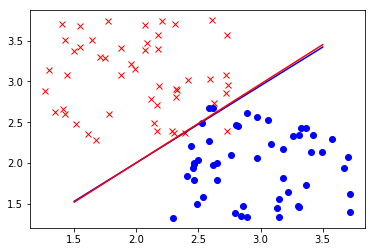

In [58]:
#Replotting out data, the linear function is this time y=(2.503x+.192)/2.595, and is now plotted as the red line (blue is the
#previous equation)
plt.plot(t1_x1_values, t1_x2_values, 'rx', t2_x1_values, t2_x2_values, 'bo')
plt.plot([1.5,3.5],[1.53, 3.42], 'b-')
plt.plot([1.5,3.5],[1.52, 3.45], 'r-')
plt.show()

In [57]:
#Thus, the regularization still worked and didn't meaningfully change the outcome. When I have some more time, I'll try to 
#play with merging the data closer and making higher order terms of fitting so that there is a danger of overfitting that
#regularization can fix.